In [1]:
import numpy as np
import nb_general as nb
import networkx as nx
import matplotlib.pyplot as plt
import scipy.linalg as la

In [2]:
G = nx.Graph([[1,2],[2,3],[3,4],[4,1],[4,5],[5,1]])

/opt/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


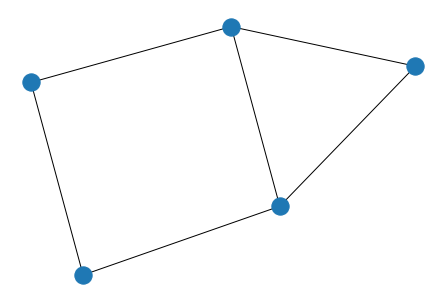

In [3]:
nx.draw(G)

In [77]:
A = nx.adjacency_matrix(G).todense()
D = np.diag(np.array(A.sum(axis=1).T)[0])
I = np.eye(D.shape[0])
n = len(G.nodes())
K = nb.create_k(G)

In [78]:
a_vals, a_vecs = la.eig(A)
k_vals, k_vecs = la.eig(K)

a_vals, a_vecs = np.sort(a_vals), a_vecs[:,np.argsort(a_vals)]
k_vals, k_vecs = np.sort(k_vals), k_vecs[:,np.argsort(k_vals)]

In [79]:
a_vecs[:,0]
k_vals

array([ 1.42405422+0.j        ,  1.        +0.j        ,
       -0.95668457+0.64119966j, -0.95668457-0.64119966j,
       -0.5598189 +0.99989611j, -0.5598189 -0.99989611j,
       -0.04331543+1.22718564j, -0.04331543-1.22718564j,
        0.34779179+0.97392469j,  0.34779179-0.97392469j])

In [80]:
k_vecs[n:,0]

array([0.27207606+0.j, 0.24157168+0.j, 0.24157168+0.j, 0.27207606+0.j,
       0.25591808+0.j])

In [81]:
la.eig(k_vals[0]*A-(D+I))

(array([ 0.02793042+0.j, -6.43333565+0.j, -5.09174027+0.j, -3.41477279+0.j,
        -2.08808172+0.j]),
 array([[ 4.73438181e-01+0.j,  5.76906292e-01+0.j, -4.88994897e-01+0.j,
          4.08875446e-01+0.j,  1.91677542e-01+0.j],
        [ 4.20357655e-01+0.j, -4.08875446e-01-0.j,  1.98064833e-01+0.j,
          5.76906292e-01+0.j, -5.32981955e-01+0.j],
        [ 4.20357655e-01+0.j,  4.08875446e-01-0.j,  1.98064833e-01+0.j,
         -5.76906292e-01+0.j, -5.32981955e-01+0.j],
        [ 4.73438181e-01+0.j, -5.76906292e-01-0.j, -4.88994897e-01+0.j,
         -4.08875446e-01+0.j,  1.91677542e-01+0.j],
        [ 4.45321751e-01+0.j, -6.53073460e-16-0.j,  6.65814258e-01+0.j,
          6.32945559e-16+0.j,  5.98648404e-01+0.j]]))

In [82]:
k_vals[0]

(1.424054220740945+0j)

In [86]:
np.round(k_vals[0]**2*k_vecs[n:,0]-k_vals[0]*A@k_vecs[n:,0]+(D-I)@k_vecs[n:,0],4)

matrix([[-0.+0.j,  0.+0.j, -0.+0.j,  0.+0.j,  0.+0.j]])

In [69]:
(D-I)@k_vecs[n:,0]

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 5 is different from 1)

In [76]:
np.array(A.sum(axis=1).T)[0]

array([3, 2, 2, 3, 2], dtype=int64)